# Brief - Les modèles dans tous leurs états

### Tutoriel 3 - Le dataset Iris & le modèle K-means

Avec ce dernier tutoriel, nous allons aborder un exemple de modèle de K-means. Ici, nous n'avons pas un modèle supervisé. Avec un dataset 'iris, nous souhaitons trouver et établir des groupes de fleurs à partir du dataset, sans information préalables sur le type de fleurs.

Dans un premier temps, installons les librairies nécessaires

In [31]:
# Import packages
import numpy as np
import pandas as pd
import sklearn
#from sklearn import svm
from sklearn import datasets
from sklearn.cluster import KMeans
#from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn import datasets, metrics
from sklearn.datasets import load_iris

Nous avons un dataset iris à disposition. Pour le lire, il nous faut utiliser la commande load.iris(), qui est permise grâce aux packages datasets de sklearn.

In [32]:
# Import the dataset iris
iris = sklearn.datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Dans ce dataset, chaque ligne correspond à des données(4) d'une fleur, avec les variables explicatives suivantes :
- sepal lenght
- sepal width
- petal lentght
- petal width

et il y a 3 classes pour distinguer ces fleurs (0, 1, 2), qui doivent renvoyer à aux fleurs suivantes : setosa, versicolor et virginica.

Pour une meilleure visualisation des données, je propose de mettre ces données sous forme d'un dataframe : 

In [34]:
# utiliser la librairie pandas pour avoir un tableau
iris = pd.DataFrame(iris.data)
iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
iris.columns = [
    "sepal_lenght",
    "sepal_width",
    "petal_lenght",
    "petal_width"
]
iris
#ajouter une colonne catégorie ?

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


###### Construction du modèle K-means

Pour faire notre entrainement de K-means, nous allons utiliser la librairie Scikit-Learn. On indique le nombre de clusters à former et utiliser la commande .fit() pour les calculer.

Contrairement, à un apprentissage supervisé, nous n'avons pas besoin de données test/apprentissage.

In [60]:
# construction du modèle de k-means
model = KMeans(n_clusters = 3)
model.fit(iris)
print(model.labels_)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Lorsqu'on exécute ce code, nous avons un tableau recensant le numéro de cluster pour chaque lignes de caractéristiques (donc, une fleur). Nous avons demandé 3 clusters différents, que l'on retrouve ici : 0 - 1 - 2.
Avec ce tableau, nous pouvons voir que la première fleur fait partie de la catégorie 0 et la dernière, de la catégorie 1.

Suite à cela, nous pouvons tester une première visualisation de ce tableau dans un nuage de points et voir les clusters qui se sont formés.

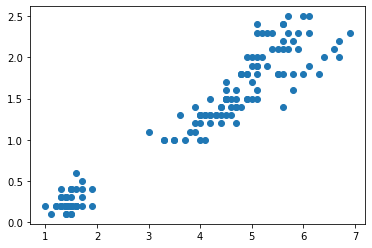

In [69]:
plt.scatter(iris['petal_lenght'], iris['petal_width'])

En prenant la longueur et la largeur des pétales, on voit qu'il y a deux groupes de fleurs qui se distinguent. 

En prenant en compte chaque paramètre, nous pouvons réaliser un cluster qui inclut aussi la longueur et la largeur du sépale.

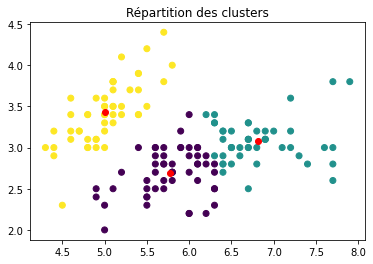

In [76]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], 
            model.cluster_centers_[:,1], 
            c = 'r', 
           )
plt.title("Répartition des clusters")
plt.show()

Nous pouvons tester avec de nouvelles données pour voir ce que cela donne. Rent

In [107]:
Iries_To_Predict = [
  [5.5, 2.5, 2, 1],
    [7, 3, 4, 1.5],
    [3, 2, 4, 3],
    [5, 3, 4, 6]  
]

In [108]:
model.predict(Iries_To_Predict) 

ValueError: X has 4 features, but KMeans is expecting 2 features as input.

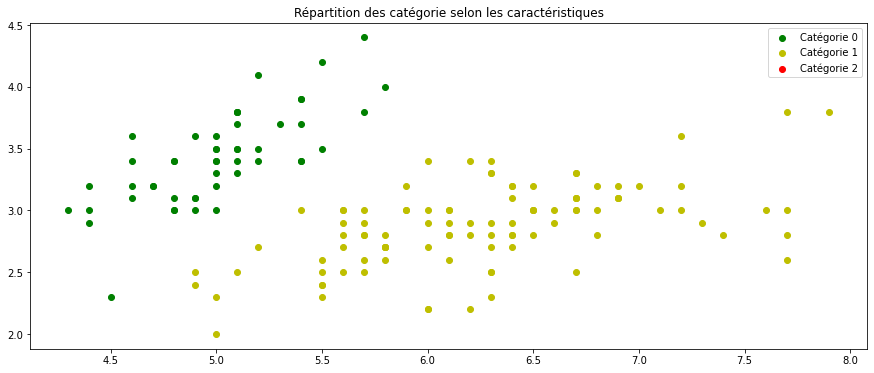

In [54]:
# Visualize data
plt.figure(figsize=(15, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='Catégorie 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='Catégorie 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='r', label='Catégorie 2')
plt.title("Répartition des catégorie selon les caractéristiques")
plt.legend();

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e20)
model.fit(X,y)

LogisticRegression(C=1e+20)

In [55]:
Iries_To_Predict = [
  [5.5, 2.5],
    [7, 3],
    [3,2],
    [5,3]  
]

In [56]:
model.predict(Iries_To_Predict) 

array([1, 0, 2, 2])

In [40]:
plt.scatter(iris.cluster_centers_[:, 0], iris.cluster_centers_[:, 1], s=100, c='black')

AttributeError: 'DataFrame' object has no attribute 'cluster_centers_'